In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
# import tensorflow as tf

In [2]:
def array_splits_of_size(N, array):
    return np.array_split(array, len(array) // N)

In [12]:
with open("analysis.pt", "rb") as file:
    analysis = pickle.load(file)
for k in analysis.keys(): print(k, len(analysis[k]))
total_transitions = len(analysis[k])

loss 171171
accuracy 171171
actual_rewards 171098
aux_rewards 171098
T 4512
mean_round_length 4512
events 171098


In [4]:
EVENTS = np.array([
    "MOVED_LEFT",
    "MOVED_RIGHT",
    "MOVED_UP",
    "MOVED_DOWN",
    "WAITED",
    "INVALID_ACTION",
    "BOMB_DROPPED",
    "BOMB_EXPLODED",
    "CRATE_DESTROYED",
    "COIN_FOUND",
    "COIN_COLLECTED",
    "KILLED_OPPONENT",
    "KILLED_SELF",
    "GOT_KILLED",
    "OPPONENT_ELIMINATED",
    "SURVIVED_ROUND",
    "MOVED_BACK"
])

In [5]:
N = 32

actual_rewards_chunk_mean = np.array([np.mean(chunk) for chunk in np.array_split(analysis["actual_rewards"], N)])
actual_rewards_chunk_std = np.array([np.std(chunk) for chunk in np.array_split(analysis["actual_rewards"], N)])

aux_rewards_chunk_mean = np.array([np.mean(chunk) for chunk in np.array_split(analysis["aux_rewards"], N)])
aux_rewards_chunk_std = np.array([np.std(chunk) for chunk in np.array_split(analysis["aux_rewards"], N)])

loss_chunk_mean = np.array([np.mean(chunk) for chunk in np.array_split(analysis["loss"], N)])
loss_chunk_std = np.array([np.std(chunk) for chunk in np.array_split(analysis["loss"], N)])

accuracy_chunk_mean = np.array([np.mean(chunk) for chunk in np.array_split(analysis["accuracy"], N)])
accuracy_chunk_std = np.array([np.std(chunk) for chunk in np.array_split(analysis["accuracy"], N)])

T_chunk_mean = np.array([np.mean(chunk) for chunk in np.array_split(analysis["T"], N)])
T_chunk_std = np.array([np.std(chunk) for chunk in np.array_split(analysis["T"], N)])

mean_round_length_chunk_mean = np.array([np.mean(chunk) for chunk in np.array_split(analysis["mean_round_length"], N)])
mean_round_length_chunk_std = np.array([np.std(chunk) for chunk in np.array_split(analysis["mean_round_length"], N)])

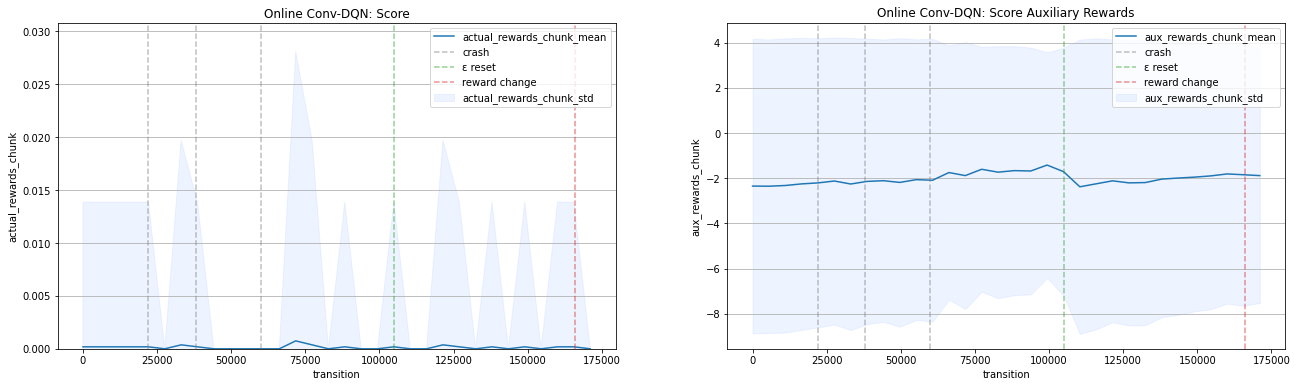

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(22, 6))

ax[0].plot(np.linspace(0, len(analysis["actual_rewards"]), N), actual_rewards_chunk_mean, label="actual_rewards_chunk_mean")
ax[0].fill_between(np.linspace(0, len(analysis["actual_rewards"]), N), actual_rewards_chunk_mean - actual_rewards_chunk_std, actual_rewards_chunk_mean + actual_rewards_chunk_std, label="actual_rewards_chunk_std", color="#bbd2ff", alpha=0.25)

ax[1].plot(np.linspace(0, len(analysis["aux_rewards"]), N), aux_rewards_chunk_mean, label="aux_rewards_chunk_mean")
ax[1].fill_between(np.linspace(0, len(analysis["aux_rewards"]), N), aux_rewards_chunk_mean - aux_rewards_chunk_std, aux_rewards_chunk_mean + aux_rewards_chunk_std, label="aux_rewards_chunk_std", color="#bbd2ff", alpha=0.25)

ax[0].set_xlabel("transition")
ax[1].set_xlabel("transition")

ax[0].set_ylabel("actual_rewards_chunk")
ax[1].set_ylabel("aux_rewards_chunk")

ax[0].set_title("Online Conv-DQN: Score")
ax[1].set_title("Online Conv-DQN: Score Auxiliary Rewards")

ax[0].grid(axis="y")
ax[1].grid(axis="y")

ax[0].set_ylim(0.0, None);
# ax[1].set_ylim(1/6, 1);

for axis in ax:
    axis.axvline(22000, linestyle='--', color='gray', linewidth=1.5, alpha=0.5, label="crash")
    axis.axvline(38000, linestyle='--', color='gray', linewidth=1.5, alpha=0.5)
    axis.axvline(60000, linestyle='--', color='gray', linewidth=1.5, alpha=0.5)
    axis.axvline(105000, linestyle='--', color='tab:green', linewidth=1.5, alpha=0.5, label="ε reset")
    axis.axvline(166000, linestyle='--', color='tab:red', linewidth=1.5, alpha=0.5, label="reward change")
    axis.legend();

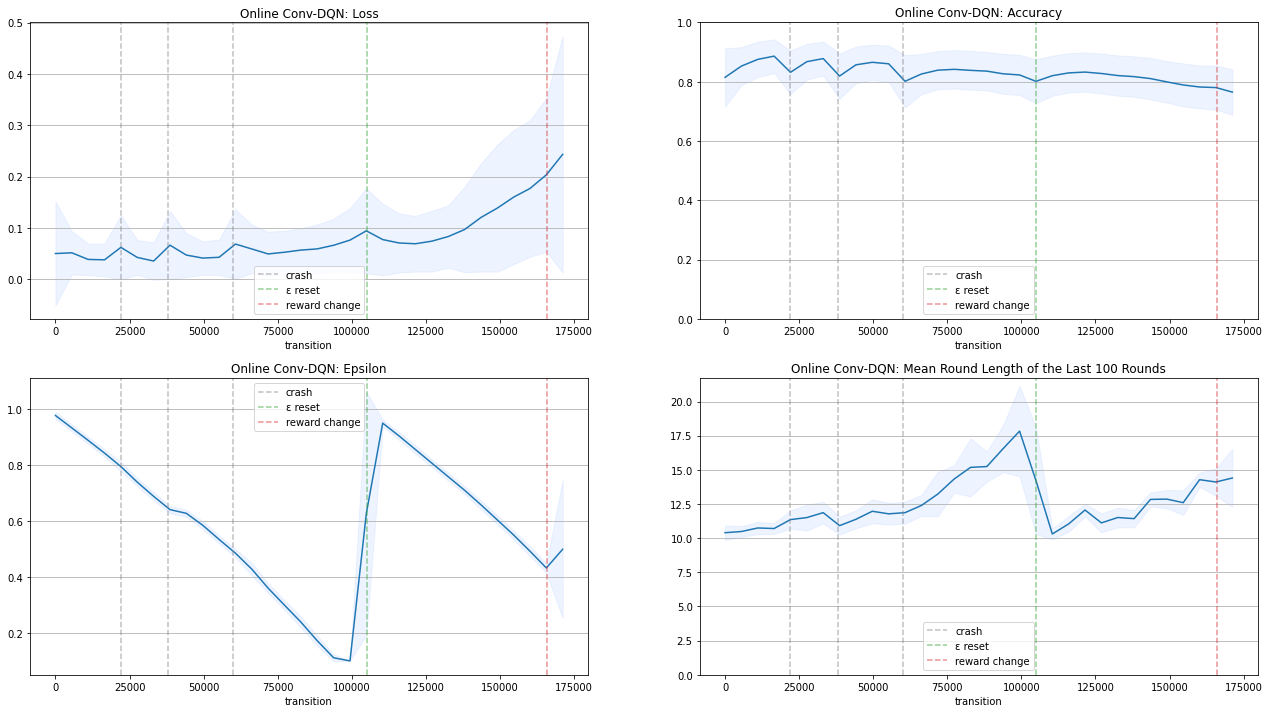

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(22, 12))

x = np.linspace(0, len(analysis["loss"]), N)

ax[0][0].plot(x, loss_chunk_mean)
ax[0][0].fill_between(x, loss_chunk_mean - loss_chunk_std, loss_chunk_mean + loss_chunk_std, color="#bbd2ff", alpha=0.25)
ax[0][1].plot(x, accuracy_chunk_mean)
ax[0][1].fill_between(x, accuracy_chunk_mean - accuracy_chunk_std, accuracy_chunk_mean + accuracy_chunk_std, color="#bbd2ff", alpha=0.25)
ax[1][0].plot(x, T_chunk_mean)
ax[1][0].fill_between(x, T_chunk_mean - T_chunk_std, T_chunk_mean + T_chunk_std, color="#bbd2ff", alpha=0.25)
ax[1][1].plot(x, mean_round_length_chunk_mean)
ax[1][1].fill_between(x, mean_round_length_chunk_mean - mean_round_length_chunk_std, mean_round_length_chunk_mean + mean_round_length_chunk_std, color="#bbd2ff", alpha=0.25)

ax[0][0].set_title("Online Conv-DQN: Loss")
ax[0][1].set_title("Online Conv-DQN: Accuracy")
ax[1][0].set_title("Online Conv-DQN: Epsilon")
ax[1][1].set_title("Online Conv-DQN: Mean Round Length of the Last 100 Rounds")

ax[0][0].set_xlabel("transition"); ax[0][0].grid(axis="y");
ax[0][1].set_xlabel("transition"); ax[0][1].grid(axis="y"); ax[0][1].set_ylim(0, 1);
ax[1][0].set_xlabel("transition"); ax[1][0].grid(axis="y");
ax[1][1].set_xlabel("transition"); ax[1][1].grid(axis="y"); ax[1][1].set_ylim(0, None);

for row in ax:
    for axis in row:
        axis.axvline(22000, linestyle='--', color='gray', linewidth=1.5, alpha=0.5, label="crash")
        axis.axvline(38000, linestyle='--', color='gray', linewidth=1.5, alpha=0.5)
        axis.axvline(60000, linestyle='--', color='gray', linewidth=1.5, alpha=0.5)
        axis.axvline(105000, linestyle='--', color='tab:green', linewidth=1.5, alpha=0.5, label="ε reset")
        axis.axvline(166000, linestyle='--', color='tab:red', linewidth=1.5, alpha=0.5, label="reward change")
        axis.legend();

In [8]:
event_splits = array_splits_of_size(min(1000, len(analysis["events"]) // 64), analysis["events"])
event_counter_bins = np.zeros((len(EVENTS), len(event_splits)))
for i, event_split in enumerate(event_splits):
    for event_list in event_split:
        for ev in event_list:
            event_counter_bins[ev][i] += 1

C:\Users\paul\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


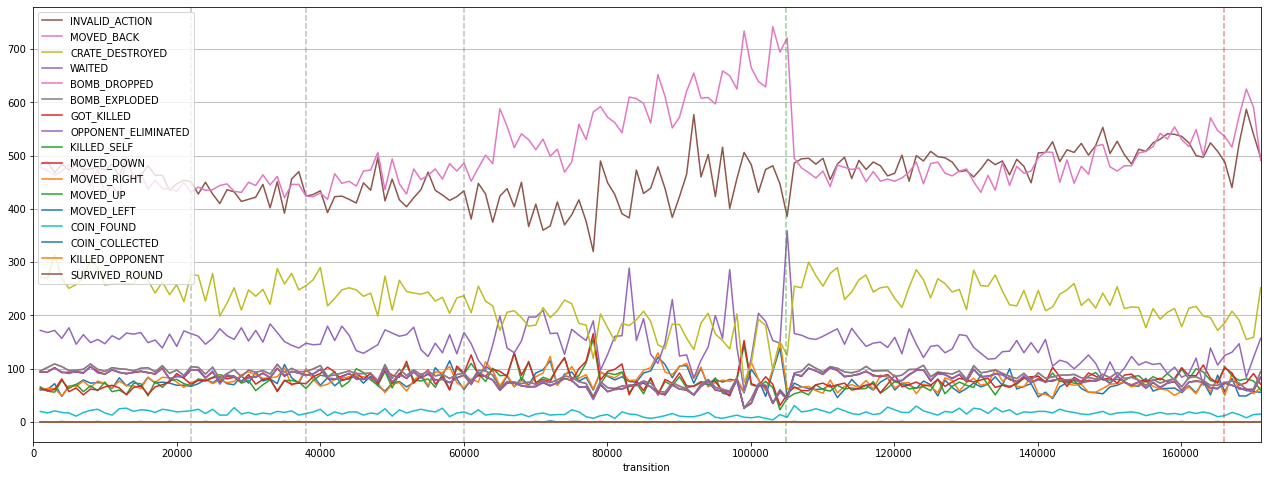

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(22, 8))

for i, this_event_counter_bin in enumerate(event_counter_bins):
    ax.plot(np.cumsum([len(split) for split in event_splits]), [np.mean(s) for s in np.array_split(this_event_counter_bin, len(event_splits))], label=EVENTS[i])

ax.axvline(22000, linestyle='--', color='gray', linewidth=1.5, alpha=0.5, label="crash")
ax.axvline(38000, linestyle='--', color='gray', linewidth=1.5, alpha=0.5)
ax.axvline(60000, linestyle='--', color='gray', linewidth=1.5, alpha=0.5)
ax.axvline(105000, linestyle='--', color='tab:green', linewidth=1.5, alpha=0.5, label="ε reset")
ax.axvline(166000, linestyle='--', color='tab:red', linewidth=1.5, alpha=0.5, label="reward change")

handles, labels = ax.get_legend_handles_labels()
labels, handles, end_value = zip(*sorted([[labels[:-3][i], handles[:-3][i], event_counter_bins[i][-1]] for i in range(len(labels[:-3]))], key=lambda a: -a[2]))
ax.legend(handles, labels, loc="upper left"); ax.grid(axis="y"); ax.set_xlabel("transition"); ax.set_xlim(0, total_transitions);

In [10]:
event_counter = np.zeros_like(EVENTS, dtype=int)
event_counter_first = np.zeros_like(EVENTS, dtype=int)
event_counter_last = np.zeros_like(EVENTS, dtype=int)
for i, event_list in enumerate(analysis["events"]):
    for ev in event_list:
        event_counter[ev] += 1
        if i > len(analysis["events"]) - 1000:
            event_counter_last[ev] += 1
        if i < 1000:
            event_counter_first[ev] += 1

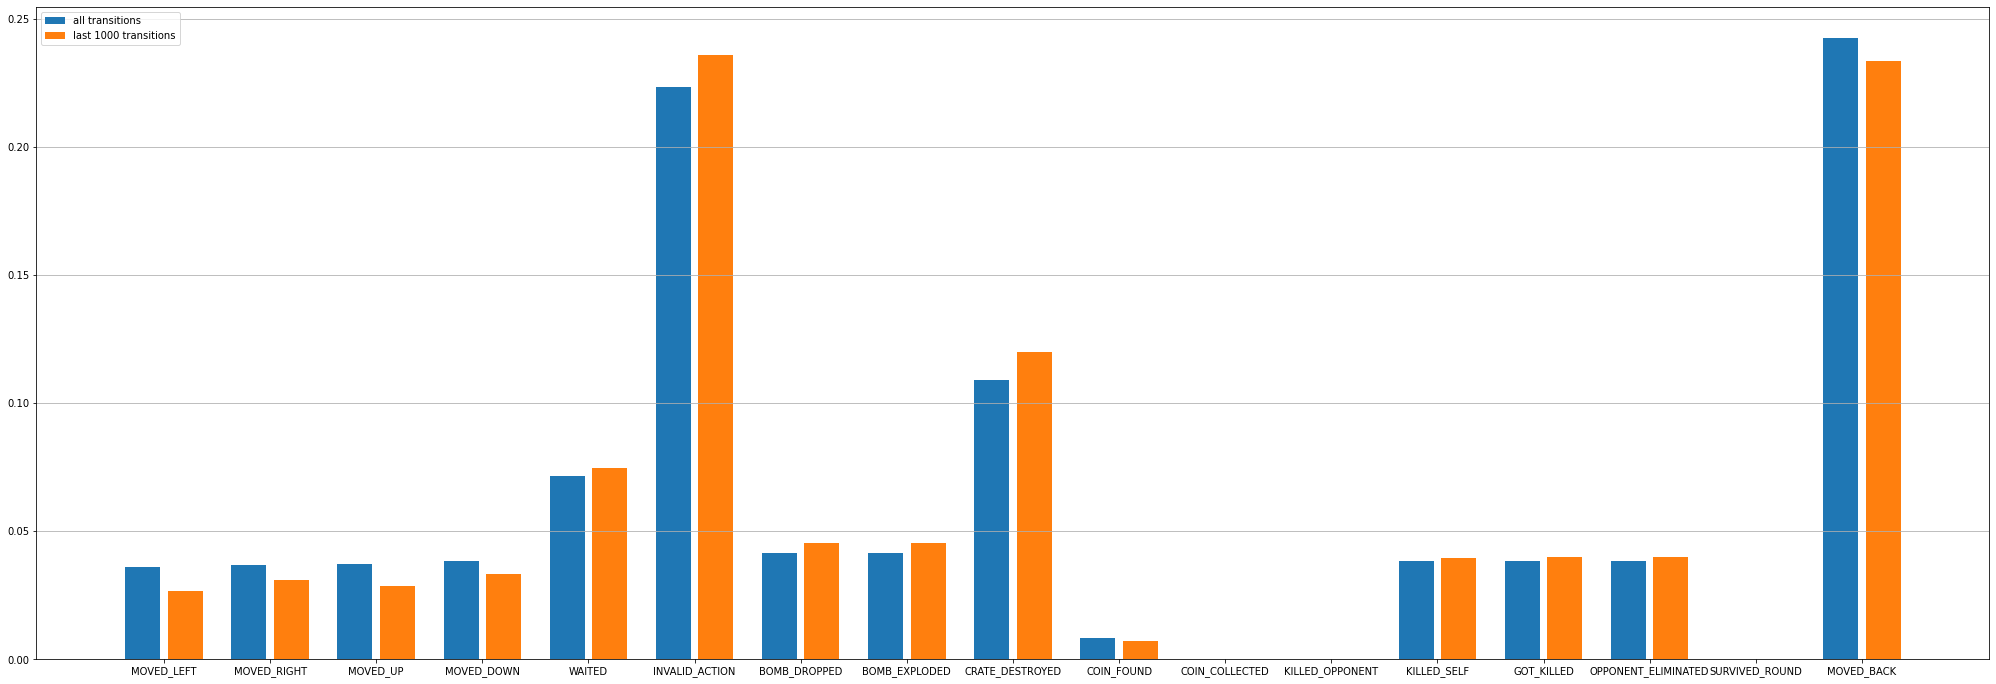

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(35, 12))
ax.bar(np.arange(len(EVENTS)) - 0.2, event_counter / np.sum(event_counter), width=0.33, label="all transitions")
ax.bar(np.arange(len(EVENTS)) + 0.2, event_counter_last / np.sum(event_counter_last), width=0.33, label="last 1000 transitions")
ax.set_xticks(np.arange(len(EVENTS)))
ax.set_xticklabels(EVENTS)
ax.legend(); ax.grid(axis="y");

In [12]:
# dqn_weights = tf.keras.models.load_model("DQN").get_weights()
# im_weights = tf.keras.models.load_model("../../offline_feature_extraction/1_imitation/16-32-64_256/imitator").get_weights()

In [13]:
# N = len(dqn_weights)
# COLS = 5
# ROWS = int(np.ceil(N/COLS))
# fig, ax = plt.subplots(ROWS, COLS, figsize=(40, 20))

# for i in range(ROWS):
#     for j in range(COLS):
#         if i * COLS + j < N:
#             bins = np.histogram(np.hstack((dqn_weights[i * COLS + j], im_weights[i * COLS + j])), bins=64)[1]
#             ax[i][j].hist(im_weights[i * COLS + j].ravel(), bins=bins, alpha=0.5, label="imitator")
#             ax[i][j].hist(dqn_weights[i * COLS + j].ravel(), bins=bins, alpha=0.5, label="DQN")
#             ax[i][j].set_title(f"Layer {i * COLS + j}" + ("*" if i * COLS + j in [0, 2, 4, 6, 8, 10] else "") )
#             ax[i][j].legend()